In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [28]:
data = pd.read_csv('results/supervised.csv')
data.head()

,Unnamed: 0,model,n_reference_groups,n_positive,n_negative,train_accuracy,test_accuracy,precision,recall,training_time,inference_time,embedding
0,0,"DummyClassifier(constant=0, strategy='constant')",60,5,5,0.500000,0.952381,0.000000,0.000000,0.000206,0.000119,pca_10
1,1,LogisticRegression(),60,5,5,0.996667,0.656825,0.135273,0.823333,0.009781,0.000249,pca_10
2,2,RidgeClassifier(),60,5,5,0.996667,0.599683,0.092908,0.730000,0.002700,0.000245,pca_10
3,3,SVC(),60,5,5,0.985000,0.747778,0.191236,0.810000,0.000522,0.000479,pca_10
4,4,RandomForestClassifier(),60,5,5,1.000000,0.663968,0.134011,0.813333,0.154032,0.027675,pca_10


# Accuracy

array([[<AxesSubplot:title={'center':'train_accuracy'}>,
        <AxesSubplot:title={'center':'test_accuracy'}>],
       [<AxesSubplot:title={'center':'precision'}>,
        <AxesSubplot:title={'center':'recall'}>]], dtype=object)

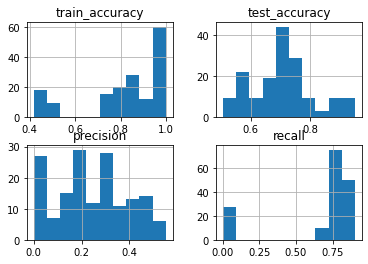

In [29]:
data[["train_accuracy", "test_accuracy", "precision", "recall"]].hist()

So, when it comes to test accuracy, we're talking between 0.6 and 0.8.

# Speed

In [30]:
data.groupby(['model', 'embedding'])[["training_time", "inference_time"]].mean()

training_time  \
model                                            embedding                  
DummyClassifier(constant=0, strategy='constant') pca_10          0.000164   
                                                 pca_50          0.000145   
                                                 specter         0.000213   
KNeighborsClassifier(n_neighbors=3)              pca_10          0.000439   
                                                 pca_50          0.000237   
                                                 specter         0.000336   
LogisticRegression()                             pca_10          0.008861   
                                                 pca_50          0.008485   
                                                 specter         0.014170   
RandomForestClassifier()                         pca_10          0.137702   
                                                 pca_50          0.129868   
                                                 specter         0.146227   
RidgeClassifier()                                pca_10          0.001855   
                                                 pca_50          0.001705   
                                                 specter         0.002395   
SVC()                                            pca_10          0.000521   
                                                 pca_50          0.000492   
                                                 specter         0.000699   

                                                            inference_time  
model                                            embedding                  
DummyClassifier(constant=0, strategy='constant') pca_10           0.000084  
                                                 pca_50           0.000074  
                                                 specter          0.000093  
KNeighborsClassifier(n_neighbors=3)              pca_10           0.005729  
                                                 pca_50           0.004987  
                                                 specter          0.006731  
LogisticRegression()                             pca_10           0.000211  
                                                 pca_50           0.000228  
                                                 specter          0.000570  
RandomForestClassifier()                         pca_10           0.024534  
                                                 pca_50           0.021793  
                                                 specter          0.025157  
RidgeClassifier()                                pca_10           0.000207  
                                                 pca_50           0.000204  
                                                 specter          0.000605  
SVC()                                            pca_10           0.000657  
                                                 pca_50           0.000981  
                                                 specter          0.002023

Logistic regression and SVC are both hurt by the dimensionality at inference time, but they are both so much faster than random forest that it barely matters.

Btw these numbers don't have any inherent meaning they're just relative values.

In [10]:
data['n_examples'] = data.n_positive + data.n_negative
np.unique(data.n_examples)

array([10, 20, 40])